In [1]:
import sys
import os
import struct
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline

fpX = np.float32

import torch 
root = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(os.path.join(root, 'code'))
from plotting_and_analysis import plot_utils, summary_plots, spatial_fits, analysis_utils
plot_utils.set_plotting_defaults()

In [2]:
subject = 1
volume_space=True

fitting_types = ['sketch_tokens', \
                 'sketch_tokens_pca_max1dim', 'sketch_tokens_pca_max11dim', \
                 'sketch_tokens_lda_all_supcat','sketch_tokens_lda_animacy', 
                 'sketch_tokens_lda_person','sketch_tokens_lda_animal', \
                 'sketch_tokens_lda_vehicle','sketch_tokens_lda_food']

outputs = []
root = os.path.dirname(os.path.dirname(os.getcwd()))
for fi, fitting_type in enumerate(fitting_types):
    
    print(fitting_type)
    out, fig_save_folder = analysis_utils.load_fit_results(subject, volume_space, \
                                    fitting_type, n_from_end=0, root=root, verbose=True);
    outputs.append(out)

if not os.path.exists(fig_save_folder):
    os.makedirs(fig_save_folder)
    


sketch_tokens
loading from /user_data/mmhender/imStat/model_fits/S01/sketch_tokens/Oct-11-2021_1756_51/all_fit_params

dict_keys(['subject', 'volume_space', 'fitting_type', 'voxel_mask', 'brain_nii_shape', 'image_order', 'voxel_index', 'voxel_roi', 'voxel_ncsnr', 'aperture', 'aperture_rf_range', 'models', 'n_prf_sd_out', 'best_losses', 'best_lambdas', 'best_params', 'lambdas', 'val_cc', 'val_r2', 'partial_masks', 'partial_version_names', 'stack_result', 'stack_result_lo', 'partial_models_used_for_stack', 'train_r2', 'train_cc', 'zscore_features', 'ridge', 'debug', 'up_to_sess', 'shuff_rnd_seed', 'min_pct_var', 'max_pc_to_retain', 'use_pca_st_feats', 'use_lda_st_feats', 'use_lda_animacy_st_feats'])
sketch_tokens_pca_max1dim
loading from /user_data/mmhender/imStat/model_fits/S01/sketch_tokens_pca_max1dim/Oct-11-2021_2332_11/all_fit_params

dict_keys(['subject', 'volume_space', 'fitting_type', 'voxel_mask', 'brain_nii_shape', 'image_order', 'voxel_index', 'voxel_roi', 'voxel_ncsnr', 'aper

In [3]:
from plotting_and_analysis import analysis_utils, spatial_fits
import copy

out1 = outputs[0]
retlabs, catlabs, ret_group_names, categ_group_names = analysis_utils.get_combined_rois(subject, out1)
best_ecc_deg, best_angle_deg, best_size_deg = spatial_fits.get_prf_pars_deg(out1, screen_eccen_deg=8.4)

port=33333

names0 = ['pRF eccentricity', 'pRF angle', 'pRF size']
maps0 = [best_ecc_deg, best_angle_deg, best_size_deg]
cmaps0 = ['PRGn', 'Retinotopy_RYBCR', 'PRGn']
mins0 = [0,0,0]
maxes0 = [7, 360, 4]

names1 = ['R2: %s'%fitting_type for fitting_type in fitting_types]
maps1 = [copy.deepcopy(out['val_r2'][:,0:1]) for out in outputs]


names1+=['model w higher R2: 1 dim PCA or animacy LDA', \
          'model w higher R2: 11 dim PCA or 12-supercat LDA']

max_ind1 = (np.argmax(np.concatenate([maps1[1], maps1[4]], axis=1), axis=1)).astype(np.float32)
max_ind2 = (np.argmax(np.concatenate([maps1[2], maps1[3]], axis=1), axis=1)).astype(np.float32)

maps1+=[max_ind1[:,np.newaxis], max_ind2[:,np.newaxis]]

bad_voxels = np.all(np.concatenate(maps1, axis=1)<0, axis=1)
for vals in maps1:
    vals[bad_voxels] = np.nan

# maps1 = [np.squeeze(np.sqrt(val_rsq1)), np.squeeze(np.sqrt(val_rsq2)),\
#          np.squeeze(np.sqrt(val_rsq3)), np.squeeze(np.sqrt(val_rsq4)), \
#          max_ind1, max_ind2]

cmaps1 = ['PuBu', 'PuBu', 'PuBu', 'PuBu', 'PuBu', 'PuBu', 'PuBu', 'PuBu', 'PuBu', 'plasma_r', 'plasma_r']
mins1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ] 
maxes1 = [0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 2, 2]

maps1 = [np.sqrt(np.squeeze(m)) for m in maps1]

maps = maps0+maps1
cmaps=cmaps0+cmaps1
names=names0+names1
mins=mins0+mins1
maxes=maxes0+maxes1

plot_utils.plot_maps_pycortex(maps, names, subject, out1, fitting_types[0], port, cmaps=cmaps, mins=mins, maxes=maxes)

[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
Data is in 3d volume space


/home/mmhender/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in sqrt


navigate browser to: 127.0.0.1:33333
Started server on port 33333
Stopping server


In [9]:
out4['best_params'][1].shape

(18947, 11, 1)

In [24]:
fig_save_folder = '/user_data/mmhender/imStat/figures/S01/compare_models/'
# os.makedirs(fig_save_folder)

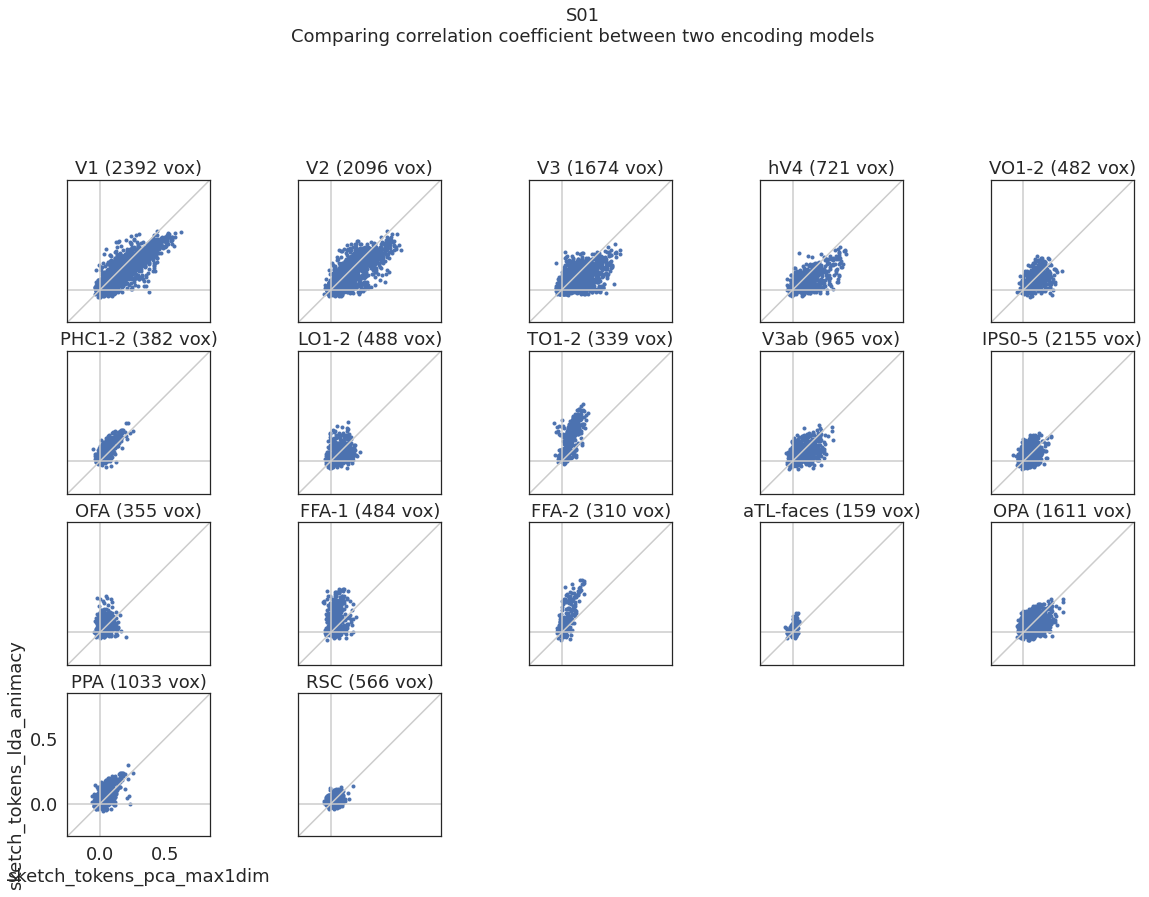

In [4]:
plot_utils.set_all_font_sizes(fs = 18)
cc_cutoff = 0.20
val_cc1 = out1['val_cc'][:,0:1]
val_cc2 = out3['val_cc'][:,0:1]
dat = np.concatenate((val_cc1,val_cc2), axis=1)

inds2use = np.ones([len(val_cc1),])==1

sp = plot_utils.scatter_plot(color=None, xlabel=fitting_type1, ylabel=fitting_type3, \
                             xlims=[-0.25, 0.85], ylims=[-0.25, 0.85], \
                  xticks=[0, 0.5], yticks=[0, 0.5],\
                  show_diagonal=True, show_axes=True);

plot_utils.create_roi_subplots(dat, inds2use, sp, subject, out1,\
                    suptitle='S%02d\nComparing correlation coefficient between two encoding models'%(subject), \
                   label_just_corner=True, figsize=(20,24))

plt.gcf().subplots_adjust(bottom=0.5)
if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'scatter_%s_vs_%s_eachroi.pdf'%(fitting_type1, fitting_type2)))
    plt.savefig(os.path.join(fig_save_folder,'scatter_%s_vs_%s_eachroi.png'%(fitting_type1, fitting_type2)))

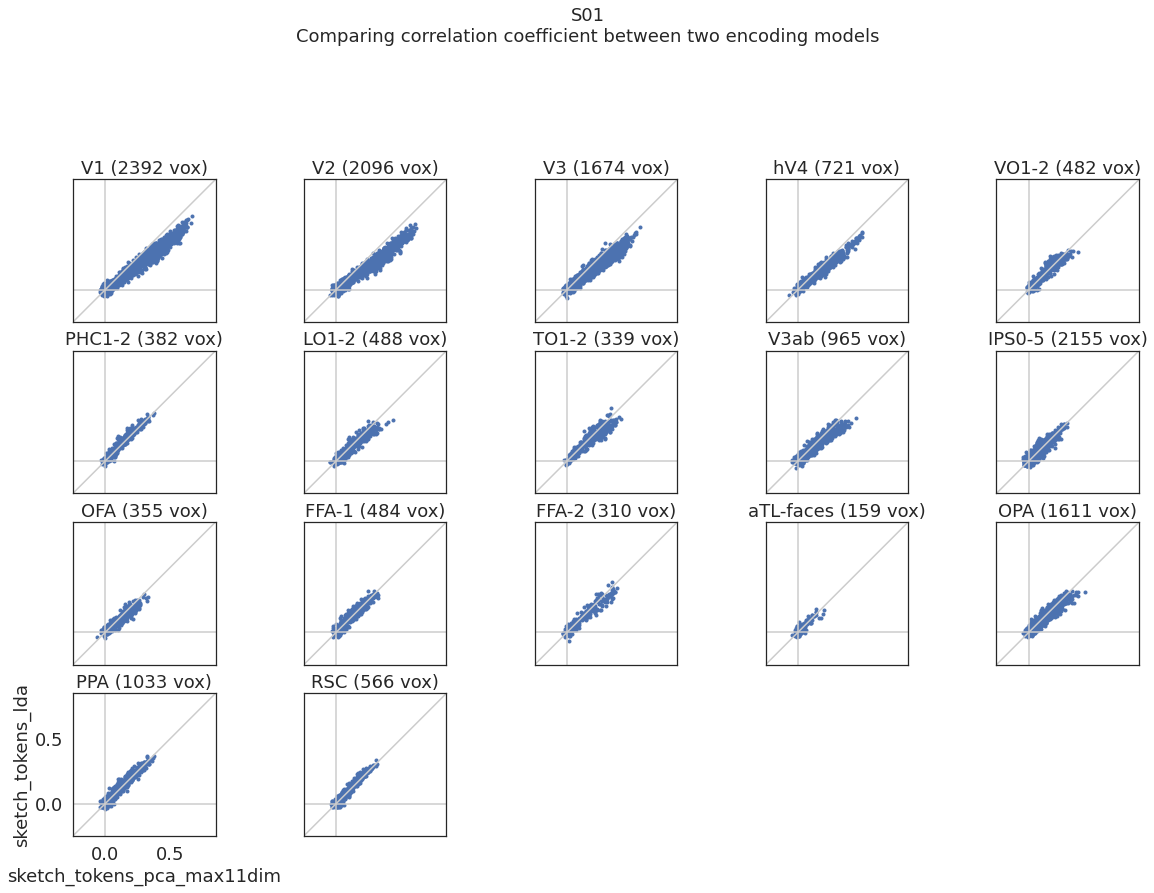

In [13]:
plot_utils.set_all_font_sizes(fs = 18)
cc_cutoff = 0.20
val_cc1 = out2['val_cc'][:,0:1]
val_cc2 = out4['val_cc'][:,0:1]
dat = np.concatenate((val_cc1,val_cc2), axis=1)

inds2use = np.ones([len(val_cc1),])==1

sp = plot_utils.scatter_plot(color=None, xlabel=fitting_type2, ylabel=fitting_type4, \
                             xlims=[-0.25, 0.85], ylims=[-0.25, 0.85], \
                  xticks=[0, 0.5], yticks=[0, 0.5],\
                  show_diagonal=True, show_axes=True);

plot_utils.create_roi_subplots(dat, inds2use, sp, subject, out1,\
                    suptitle='S%02d\nComparing correlation coefficient between two encoding models'%(subject), \
                   label_just_corner=True, figsize=(20,24))

plt.gcf().subplots_adjust(bottom=0.5)
if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'scatter_%s_vs_%s_eachroi.pdf'%(fitting_type1, fitting_type2)))
    plt.savefig(os.path.join(fig_save_folder,'scatter_%s_vs_%s_eachroi.png'%(fitting_type1, fitting_type2)))

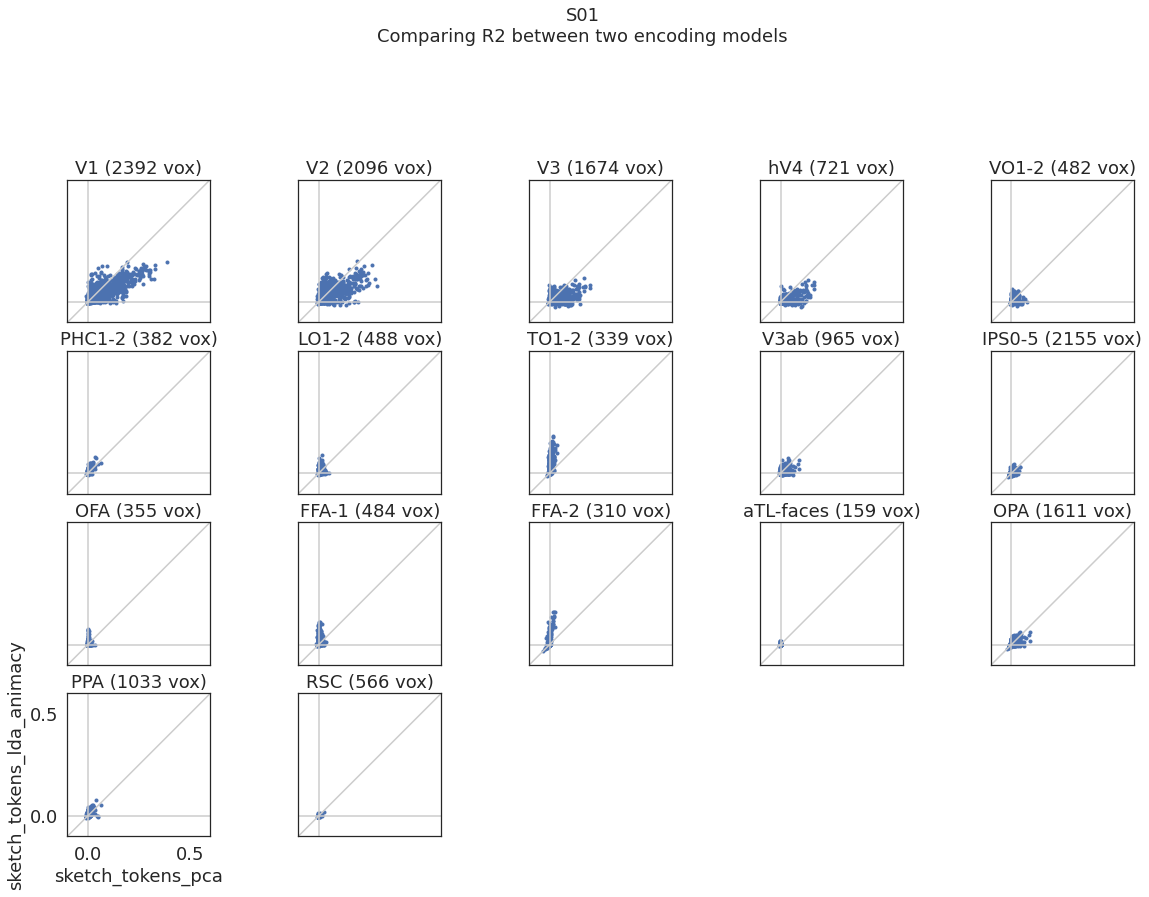

In [14]:
plot_utils.set_all_font_sizes(fs = 18)
cc_cutoff = 0.20
val_rsq1 = out1['val_r2'][:,0:1]
val_rsq2 = out3['val_r2'][:,0:1]
dat = np.concatenate((val_rsq1,val_rsq2), axis=1)

inds2use = np.ones([len(val_cc1),])==1

sp = plot_utils.scatter_plot(color=None, xlabel=fitting_type1, ylabel=fitting_type3, \
                             xlims=[-0.10, 0.60], ylims=[-0.10, 0.60], \
                  xticks=[0, 0.5], yticks=[0, 0.5],\
                  show_diagonal=True, show_axes=True);

plot_utils.create_roi_subplots(dat, inds2use, sp, subject, out1,\
                    suptitle='S%02d\nComparing R2 between two encoding models'%(subject), \
                   label_just_corner=True, figsize=(20,24))

plt.gcf().subplots_adjust(bottom=0.5)
if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'scatter_%s_vs_%s_eachroi.pdf'%(fitting_type1, fitting_type2)))
    plt.savefig(os.path.join(fig_save_folder,'scatter_%s_vs_%s_eachroi.png'%(fitting_type1, fitting_type2)))

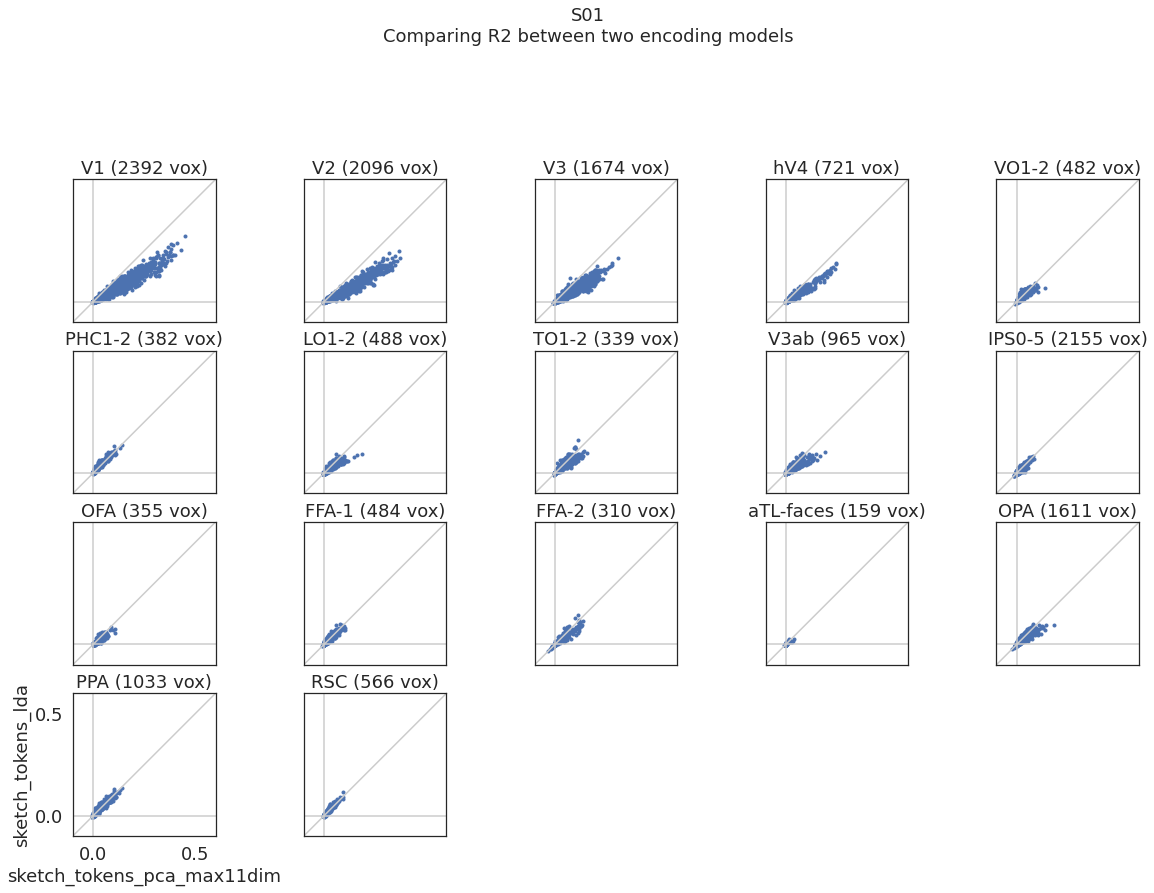

In [15]:
plot_utils.set_all_font_sizes(fs = 18)
cc_cutoff = 0.20
val_rsq1 = out2['val_r2'][:,0:1]
val_rsq2 = out4['val_r2'][:,0:1]
dat = np.concatenate((val_rsq1,val_rsq2), axis=1)

inds2use = np.ones([len(val_cc1),])==1

sp = plot_utils.scatter_plot(color=None, xlabel=fitting_type2, ylabel=fitting_type4, \
                             xlims=[-0.10, 0.60], ylims=[-0.10, 0.60], \
                  xticks=[0, 0.5], yticks=[0, 0.5],\
                  show_diagonal=True, show_axes=True);

plot_utils.create_roi_subplots(dat, inds2use, sp, subject, out1,\
                    suptitle='S%02d\nComparing R2 between two encoding models'%(subject), \
                   label_just_corner=True, figsize=(20,24))

plt.gcf().subplots_adjust(bottom=0.5)
if fig_save_folder is not None:
    plt.savefig(os.path.join(fig_save_folder,'scatter_%s_vs_%s_eachroi.pdf'%(fitting_type1, fitting_type2)))
    plt.savefig(os.path.join(fig_save_folder,'scatter_%s_vs_%s_eachroi.png'%(fitting_type1, fitting_type2)))

In [14]:
from plotting_and_analysis.analysis_utils import get_combined_rois

retlabs, catlabs, ret_group_names, categ_group_names = get_combined_rois(subject, out1)
retlabs[retlabs==0] = np.nan
catlabs[catlabs==0] = np.nan
print(retlabs)
print(catlabs)
substr = 'subj%02d'%subject

voxel_mask = out1['voxel_mask']

[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]


In [24]:
import cortex
import copy
out = out1
print('Data is in 3d volume space')
xfmname = 'func1pt8_to_anat0pt8_autoFSbbr'
nii_shape = out['brain_nii_shape']
mask_3d = np.reshape(voxel_mask, nii_shape, order='C')

dat2plot = {'ROI labels (retinotopic)': cortex.Volume(data=get_full_volume(retlabs, voxel_mask, \
                                                                           nii_shape),\
                                      subject=substr, cmap='Accent',vmin = 0, vmax = np.max(retlabs)+1,\
                                                      xfmname=xfmname, mask=mask_3d), \
    'ROI labels (category-selective)': cortex.Volume(data=get_full_volume(catlabs, voxel_mask, nii_shape),\
                                     subject=substr, cmap='Accent',vmin = 0, vmax = np.max(catlabs)+1, \
                                                     xfmname=xfmname, mask=mask_3d)}


Data is in 3d volume space


In [34]:
np.max(retlabs[~np.isnan(retlabs)])+1

13.0

In [28]:
np.sum(np.isnan(dat2plot['ROI labels (category-selective)'].data))

694674

In [29]:
np.size(dat2plot['ROI labels (category-selective)'].data)

699192

In [31]:
np.unique(dat2plot['ROI labels (retinotopic)'].data)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., nan])

In [32]:
# Open the webviewer
port=33333
print('navigate browser to: 127.0.0.1:%s'%port)
overlay_file = 'overlays.svg'
cortex.webshow(dat2plot, open_browser=True, port=port, title = 'S%02d, %s'%(subject, fitting_type1), overlay_file=overlay_file, \
              overlays_visible=('rois', 'sulci'))

navigate browser to: 127.0.0.1:33333
Started server on port 33333


<JS: window.viewer>

In [20]:
def get_full_volume(values, voxel_mask, shape):
    """
    For PyCortex: Put values for voxels that were analyzed back into their correct coordinates in full surface space matrix.
    """
    voxel_mask_3d = np.reshape(voxel_mask, shape)
    full_vals = copy.deepcopy(voxel_mask_3d).astype('float64')
    full_vals[voxel_mask_3d==0] = np.nan
    full_vals[voxel_mask_3d==1] = values
    
    full_vals = np.moveaxis(full_vals, [0,1,2], [2,1,0])
    
    return full_vals

In [13]:
np.unique(retlabs)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., nan])

In [15]:
retlabs.shape

(18947,)

In [19]:
voxel_mask.astype('int')

array([0, 0, 0, ..., 0, 0, 0])

In [10]:
np.sum(out1['voxel_roi'][0]==1)

1180

In [11]:
np.sum(out1['voxel_mask'])

14913

In [10]:
val_rsq1 = out1['val_r2'][:,0:1]
val_rsq2 = out2['val_r2'][:,0:1]
dat = np.concatenate((val_rsq1,val_rsq2), axis=1)

max_ind = (np.argmax(dat, axis=1)+1).astype(np.float32)


In [17]:
models1 = out1['best_params'][0][:,0,:]
models2 = out2['best_params'][0][:,0,:]

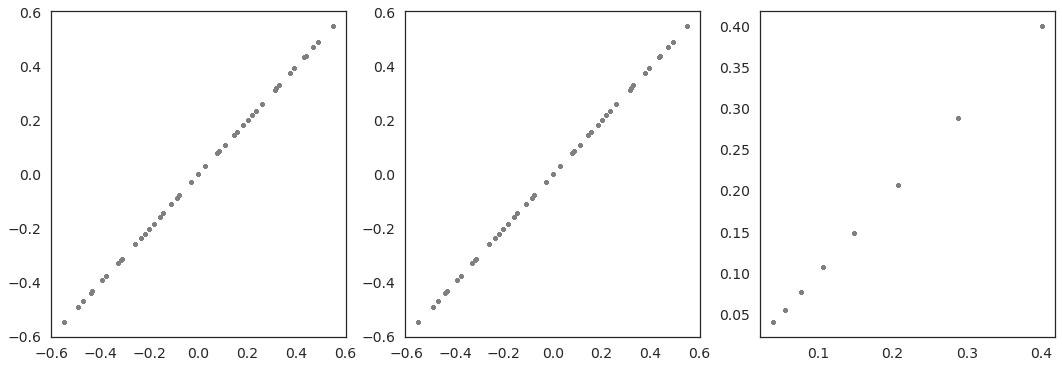

In [18]:
plt.figure(figsize=(18,6));
for ii in range(3):
    plt.subplot(1,3,ii+1)
    plt.plot(models1[:,ii], models2[:,ii],'.',color=[0.5, 0.5, 0.5, 0.1])